![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

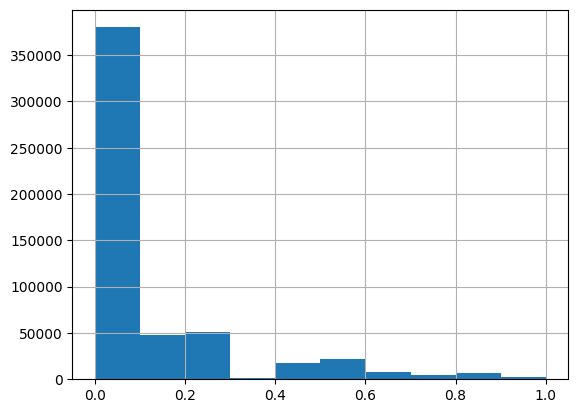

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
#Librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
# Celda 1
vect_A = CountVectorizer()
X_train_dtm_A = vect_A.fit_transform(X_train)
X_test_dtm_A = vect_A.transform(X_test)

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
reg = LinearRegression()
reg.fit(X_train_dtm_A, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test_dtm_A)
mse = mean_squared_error(y_test, y_pred)

print("MSE: {:.5f}".format(mse))

#rfr = RandomForestRegressor(random_state=0)
#rfr.fit(X_train_dtm_A, y_train)

MSE: 0.03725


Después de realizar el preprocesamiento de los datos de entrenamiento y prueba, se intentó inicialmente implementar un modelo de Random Forest para estimar los datos de prueba. Sin embargo, debido a limitaciones en la capacidad computacional, no fue posible completar el entrenamiento del modelo. En consecuencia, se optó por implementar un modelo de Regresión Lineal, el cual es un modelo más simple que requiere menos poder computacional.

Se evaluó el desempeño del modelo de Regresión Lineal utilizando el MSE como métrica de evaluación. El valor del MSE obtenido fue de 0.03725, lo que indica una buena precisión en la tarea de predicción de la probabilidad de que un comentario sea tóxico. Es importante destacar que este valor es relativamente bajo, incluso considerando el rango de valores que puede tomar la variable dependiente (0-1).

En general, se puede concluir que el modelo de Regresión Lineal implementado tuvo un desempeño satisfactorio en la tarea de estimación de la probabilidad de que un comentario sea tóxico, a pesar de ser un modelo más simple en comparación con el modelo de Random Forest inicialmente propuesto. 

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
vect_B = CountVectorizer(ngram_range=(3, 3))
X_train_dtm_B = vect_B.fit_transform(X_train)
X_test_dtm_B = vect_B.transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train_dtm_B, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test_dtm_B)
mse2 = mean_squared_error(y_test, y_pred)

print("MSE: {:.5f}".format(mse2))

#rfr = RandomForestRegressor(random_state=0)
#rfr.fit(X_train_dtm_A, y_train)

MSE: 0.03980



Se han obtenido resultados similares en cuanto a mse con respecto al punto anterior al utilizar trigramas en la función CountVectorizer, esto sugiere que el modelo no se benefició significativamente de la inclusión de trigramas en la tokenización de los comentarios.

Es posible que en este caso particular, la información adicional proporcionada por los trigramas no fuera relevante para la tarea de clasificación de los comentarios como tóxicos o no tóxicos.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

La función TfidfVectorizer sirve como técnica de tokenizacion que vectoriza un conjunto de documentos. Es decir, convierte un corpus (conjunto de documentos) en una matriz de términos de documentos, donde las filas representan los documentos y las columnas los términos. La técnica se basa en el cálculo de la frecuencia de términos en un documento (TF-IDF), para evaluar la importancia de un término en un documento en función de su frecuencia en el documento y su frecuencia en todo el corpus, y asigna una puntuación numérica a cada término en función de su importancia relativa. De esta manera, los documentos se pueden comparar numéricamente utilizando la puntuación resultante (los vectores).

Algunas de las ventajas de TfidfVectorizer en comparación con CountVectorizer son que reduce la importancia de los términos comunes que no aportan mucho valor informativo, como "el", "y", etc. También considera la importancia de los términos en todo el corpus de documentos y es útil para la identificación de temas y la clasificación de documentos.

Sin embargo, TfidfVectorizer presenta algunas desventajas al ser comparado con CountVectorizer como que no es adecuado para la identificación de términos de uso raro o específico y puede ser computacionalmente costoso para corpus de tamaño grande.







## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4

# Crear y entrenar el modelo RandomForestRegressor
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
rf_reg = LinearRegression()
rf_reg.fit(X_train_tfidf, y_train)

LinearRegression()

In [ ]:
 #Realizar predicciones en el set de prueba
y_pred = rf_reg.predict(X_test_tfidf)

# Evaluar el desempeño del modelo con la métrica del MSE
mse3 = mean_squared_error(y_test, y_pred)
print("MSE: {:.5f}".format(mse3))

MSE: 0.02800


Al implementar la tecnica de Tokenización TfidfVectorizer obtenemos un mse de 0.028, este resultado nos indica que esta tecnica es la más apropiada para el conjunto de datos que estamos utilizando.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

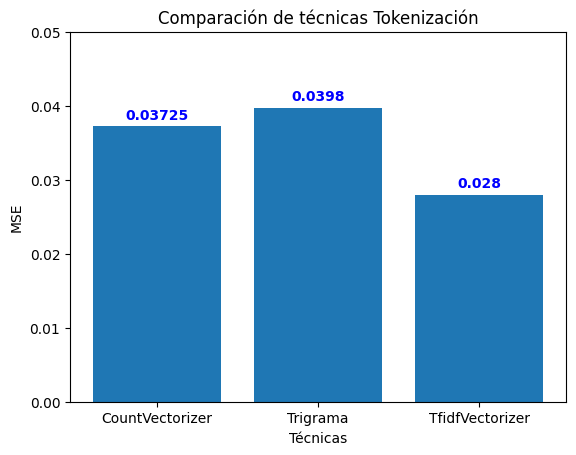

In [ ]:
# Celda 5
import matplotlib.pyplot as plt

# Datos de la gráfica
tecnicas = ['CountVectorizer', 'Trigrama', 'TfidfVectorizer']
mse = [0.03725, 0.03980, 0.02800]

# Crear la gráfica de barras
plt.bar(tecnicas, mse)

# Personalizar la gráfica
plt.title('Comparación de técnicas Tokenización')
plt.xlabel('Técnicas')
plt.ylabel('MSE')
plt.ylim([0, 0.05])

for i, v in enumerate(mse):
    plt.text(i, v + 0.001, str(v), color='blue', fontweight='bold', ha='center')

# Mostrar la gráfica
plt.show()

Con base en los resultados proporcionados, el modelo que utiliza TfidfVectorizer obtuvo el MSE con un valor de 0.028, lo que sugiere que este modelo puede ser el más efectivo para predecir la toxicidad de los comentarios en este conjunto de datos específico.

El tipo de procesamiento de texto que se usa en cada modelo tiene un gran impacto a cómo funciona el modelo. Para el modelo calculado CountVectorizer se cuenta cuántas veces aparecen las palabras en el texto y no consideran qué palabras son más importantes en el documento completo. 

Respecto al TfidfVectorizer este también cuenta las veces que aparecen las palabras en el texto, pero también tiene en cuenta si una palabra es común en todo el conjunto de datos. De esta manera, puede identificar qué palabras son más importantes en cada documento y hacer una mejor representación de los comentarios en números.

Dado lo anterior, podemos concluir que el preprocesamiento de texto adecuado puede tener un impacto significativo en el desempeño de los modelos, y que TfidfVectorizer puede ser una buena opción cuando se desea tener en cuenta la relevancia de las palabras para cada documento en el conjunto de datos.
